In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/meat-prices-19902020/Meat_prices.csv


In [2]:
data = pd.read_csv("/kaggle/input/meat-prices-19902020/Meat_prices.csv")
data.head()

,Month,Chicken Price,Chicken price % Change,Beef Price,Beef price % Change,Lamb price,Lamb price % Change,Pork Price,Pork price % Change,Salmon Price,Salmon price % Change
0,Apr-90,1.08,NaN,2.47,NaN,2.63,NaN,99.64,NaN,5.63,NaN
1,May-90,1.08,0.00%,2.48,0.40%,2.71,3.04%,115.68,16.10%,5.80,3.02%
2,Jun-90,1.11,2.78%,2.50,0.81%,2.72,0.37%,121.46,5.00%,5.67,-2.24%
3,Jul-90,1.10,-0.90%,2.56,2.40%,2.77,1.84%,96.19,-20.81%,5.74,1.23%
4,Aug-90,1.10,0.00%,2.65,3.52%,2.66,-3.97%,93.97,-2.31%,5.92,3.14%


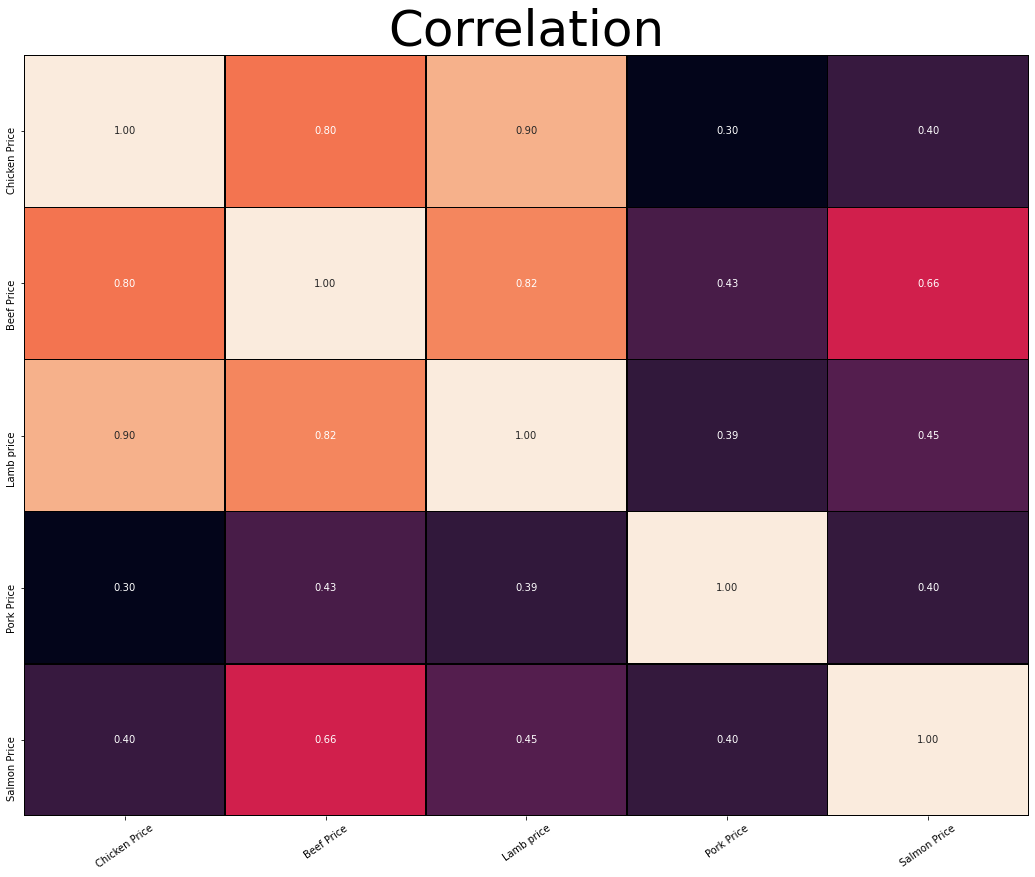

In [3]:
import seaborn as sns
plt.subplots(figsize=(18,14))
sns.heatmap(data.corr(),annot=True,linewidths=0.4,linecolor="black",fmt="1.2f",cbar=False)
plt.title("Correlation",fontsize=50)
plt.xticks(rotation=35)
plt.show()

As you can see:
* "Chicken Price" has high correlations with "Beef Price" and "Lamb Price"
* "Beef Price" has high correlations with "Chicken Price", "Lamb Price" and "Salmon Price"
* "Lamb Price" has high correlations with "Chicken Price" and "Beef Price"
* "Pork Price" does not have high correlation
* "Salmon Price" has high a correlation with "Beef Price"

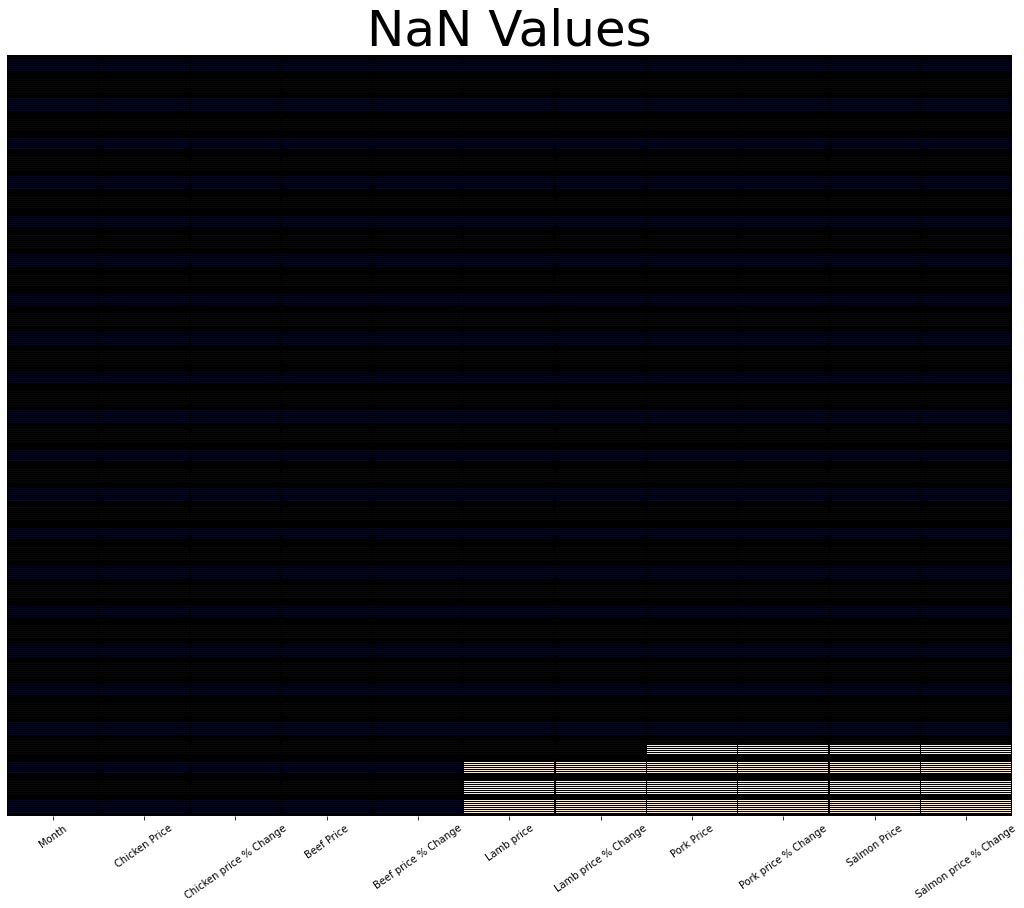

In [4]:
plt.subplots(figsize=(18,14))
sns.heatmap(data.isnull(),annot=False,linewidths=0.4,linecolor="black",fmt="1.2f",cbar=False,
           xticklabels=True,yticklabels=False)
plt.title("NaN Values",fontsize=50)
plt.xticks(rotation=35)
plt.show()

In [5]:
import plotly.express as px

price_data = data.iloc[:,[1,3,5,7,9]]
for i in price_data.columns:
    fig = px.line(price_data,x=data.Month,y=price_data[i])
    fig.update_layout(title={"text":f"{i}","x":0.5,"font":{"size":35}},
                      xaxis={"title":"Date","showgrid":True},
                      yaxis={"title":"Price","showgrid":True})
    fig.update_traces(hovertemplate="Date:'%{x}' Price: %{y}")
    fig.show()

# Data Preparation

In [6]:
monthdic = {"Jan":1,
            "Feb":2,
            "Mar":3,
            "Apr":4,
            "May":5,
            "Jun":6,
            "Jul":7,
            "Aug":8,
            "Sep":9,
            "Oct":10,
            "Nov":11,
            "Dec":12}
def textToNum(x):
    x = x.split("-")
    x[0] = str(monthdic[x[0]])
    return "-".join(x)
data.Month = data.Month.apply(textToNum)
data.Month[0:12]

0      4-90
1      5-90
2      6-90
3      7-90
4      8-90
5      9-90
6     10-90
7     11-90
8     12-90
9      1-91
10     2-91
11     3-91
Name: Month, dtype: object

In [7]:
data[["Month","Chicken Price"]]

,Month,Chicken Price
0,4-90,1.08
1,5-90,1.08
2,6-90,1.11
3,7-90,1.10
4,8-90,1.10
...,...,...
356,12-19,1.98
357,1-20,2.07
358,2-20,1.88
359,3-20,1.80


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Month                   361 non-null    object 
 1   Chicken Price           361 non-null    float64
 2   Chicken price % Change  360 non-null    object 
 3   Beef Price              361 non-null    float64
 4   Beef price % Change     360 non-null    object 
 5   Lamb price              335 non-null    float64
 6   Lamb price % Change     334 non-null    object 
 7   Pork Price              327 non-null    float64
 8   Pork price % Change     326 non-null    object 
 9   Salmon Price            327 non-null    float64
 10  Salmon price % Change   326 non-null    object 
dtypes: float64(5), object(6)
memory usage: 31.1+ KB


In [9]:
#nan values at the end so im just droping

chicken_frame = data[["Month","Chicken Price"]].dropna()
beef_frame = data[["Month","Beef Price"]].dropna()
lamb_frame = data[["Month","Lamb price"]].dropna()
pork_frame = data[["Month","Pork Price"]].dropna()
salmon_frame = data[["Month","Salmon Price"]].dropna()
salmon_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327 entries, 0 to 326
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Month         327 non-null    object 
 1   Salmon Price  327 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.7+ KB


In [10]:
chicken_frame

,Month,Chicken Price
0,4-90,1.08
1,5-90,1.08
2,6-90,1.11
3,7-90,1.10
4,8-90,1.10
...,...,...
356,12-19,1.98
357,1-20,2.07
358,2-20,1.88
359,3-20,1.80


In [11]:
from sklearn.preprocessing import MinMaxScaler

chicken_scaler = MinMaxScaler(feature_range=(0,1))
chicken_frame["Chicken Price Scaled"] = chicken_scaler.fit_transform(chicken_frame["Chicken Price"].values.reshape(-1,1))

beef_scaler = MinMaxScaler(feature_range=(0,1))
beef_frame["Beef Price Scaled"] = beef_scaler.fit_transform(beef_frame["Beef Price"].values.reshape(-1,1))

lamb_scaler = MinMaxScaler(feature_range=(0,1))
lamb_frame["Lamb price Scaled"] = lamb_scaler.fit_transform(lamb_frame["Lamb price"].values.reshape(-1,1))

pork_scaler = MinMaxScaler(feature_range=(0,1))
pork_frame["Pork Price Scaled"] = pork_scaler.fit_transform(pork_frame["Pork Price"].values.reshape(-1,1))

salmon_scaler = MinMaxScaler(feature_range=(0,1))
salmon_frame["Salmon Price Scaled"] = salmon_scaler.fit_transform(salmon_frame["Salmon Price"].values.reshape(-1,1))

In [12]:
salmon_frame

,Month,Salmon Price,Salmon Price Scaled
0,4-90,5.63,0.517628
1,5-90,5.80,0.544872
2,6-90,5.67,0.524038
3,7-90,5.74,0.535256
4,8-90,5.92,0.564103
...,...,...,...
322,2-17,7.88,0.878205
323,3-17,7.20,0.769231
324,4-17,7.44,0.807692
325,5-17,8.02,0.900641


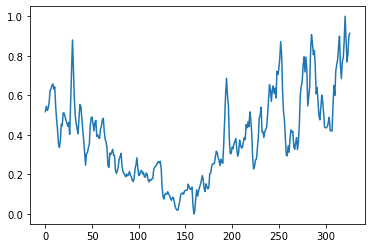

In [13]:
plt.plot(salmon_frame["Salmon Price Scaled"])
plt.show()

# SARIMAX

In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import plotly.graph_objects as go

def sarimax_predict(frame):
    sarimax_frame = frame.iloc[:,1].values[:-36]
    sarimax = SARIMAX(sarimax_frame, order=(1,1,1), seasonal_order = (1,1,1,36))
    sarimax_model = sarimax.fit()
    #print(sarimax_model.summary())
    
    y_pred = sarimax_model.forecast(72)
    forecast_test = np.hstack((sarimax_frame,y_pred))
    
    length = [*range(len(forecast_test))]

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=length,y=forecast_test, name="Predicted Value", mode="lines"))
    fig.add_trace(go.Scatter(x=length,y=frame.iloc[:,1].values, name="Real Value", mode="lines"))
    fig.update_layout(title={"text":f"{frame.columns[1]} by SARIMAX","x":0.5,"font":{"size":35}},
                      xaxis={"title":"Month","showgrid":True},
                      yaxis={"title":"Price","showgrid":True})
    fig.update_traces(hovertemplate="Month:'%{x}' Price: %{y}")
    fig.show()
    
    return forecast_test

salmon_sarimax  = sarimax_predict(salmon_frame)
chicken_sarimax = sarimax_predict(chicken_frame)
beef_sarimax    = sarimax_predict(beef_frame)
lamb_sarimax    = sarimax_predict(lamb_frame)
pork_sarimax    = sarimax_predict(pork_frame)


# LSTM

In [15]:
stemp_x = 36 # from
stemp_y = 36 # to
def fillMyLists(frame,columnNo):
    tempx = []
    tempy = []
    for i in range(stemp_x,len(frame)-stemp_y):
        tempx.append(frame.iloc[i-stemp_x:i,[columnNo]].values)
        tempy.append(frame.iloc[i + 1:i + stemp_y + 1,columnNo].values)
    tempx = np.asarray(tempx)
    tempy = np.asarray(tempy)
    return tempx.astype("float32") , tempy.astype("float32")

chicken_x, chicken_y = fillMyLists(chicken_frame,2)
beef_x, beef_y       = fillMyLists(beef_frame,2)
lamb_x, lamb_y       = fillMyLists(lamb_frame,2)
pork_x, pork_y       = fillMyLists(pork_frame,2)
salmon_x, salmon_y   = fillMyLists(salmon_frame,2)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Activation, Dropout, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping



def Model(test_train,return_sequences=False,stateful=False):
    
    model = Sequential()
    
    model.add(Input(shape=(stemp_x,1)))

    model.add(LSTM(128,return_sequences=True, stateful=stateful))
    model.add(LSTM(128,return_sequences=False, stateful=stateful))
    
    model.add(Dense(stemp_y))
    
    model.compile(loss=mean_squared_error,optimizer=Adam(lr=0.001))
    return model

reducer = ReduceLROnPlateau(monitor="loss",factor=0.5,patience=5,min_lr=0.0000000001,verbose=1)
stopsign = EarlyStopping(monitor="loss",min_delta=0.000000000001,patience=15)
epochs = 300
batch_size = 16

chicken_model = Model("train")
print("Chicken Fitting")
chicken_model.fit(chicken_x,chicken_y,epochs=epochs,batch_size=batch_size,callbacks=[reducer,stopsign],verbose=2)

beef_model = Model("train")
print("Beef Fitting")
beef_model.fit(beef_x,beef_y,epochs=epochs,batch_size=batch_size,callbacks=[reducer,stopsign],verbose=2)

lamb_model = Model("train")
print("Lamb Fitting")
lamb_model.fit(lamb_x,lamb_y,epochs=epochs,batch_size=batch_size,callbacks=[reducer,stopsign],verbose=2)

pork_model = Model("train")
print("Pork Fitting")
pork_model.fit(pork_x,pork_y,epochs=epochs,batch_size=batch_size,callbacks=[reducer,stopsign],verbose=2)

salmon_model = Model("train")
print("Salmon Fitting")
salmon_model.fit(salmon_x,salmon_y,epochs=epochs,batch_size=batch_size,callbacks=[reducer,stopsign],verbose=2)

Chicken Fitting
Epoch 1/300
19/19 - 0s - loss: 0.0696 - lr: 0.0010
Epoch 2/300
19/19 - 0s - loss: 0.0135 - lr: 0.0010
Epoch 3/300
19/19 - 0s - loss: 0.0115 - lr: 0.0010
Epoch 4/300
19/19 - 0s - loss: 0.0104 - lr: 0.0010
Epoch 5/300
19/19 - 0s - loss: 0.0107 - lr: 0.0010
Epoch 6/300
19/19 - 0s - loss: 0.0109 - lr: 0.0010
Epoch 7/300
19/19 - 0s - loss: 0.0098 - lr: 0.0010
Epoch 8/300
19/19 - 0s - loss: 0.0104 - lr: 0.0010
Epoch 9/300
19/19 - 0s - loss: 0.0098 - lr: 0.0010
Epoch 10/300
19/19 - 0s - loss: 0.0099 - lr: 0.0010
Epoch 11/300
19/19 - 0s - loss: 0.0096 - lr: 0.0010
Epoch 12/300
19/19 - 0s - loss: 0.0094 - lr: 0.0010
Epoch 13/300
19/19 - 0s - loss: 0.0108 - lr: 0.0010
Epoch 14/300
19/19 - 0s - loss: 0.0100 - lr: 0.0010
Epoch 15/300
19/19 - 0s - loss: 0.0097 - lr: 0.0010
Epoch 16/300
19/19 - 0s - loss: 0.0094 - lr: 0.0010
Epoch 17/300

Epoch 00017: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
19/19 - 0s - loss: 0.0098 - lr: 0.0010
Epoch 18/300
19/19 - 0s - lo

In [17]:
chicken_predict_scaled = chicken_model.predict(chicken_x)
beef_predict_scaled = beef_model.predict(beef_x)
lamb_predict_scaled = lamb_model.predict(lamb_x)
pork_predict_scaled = pork_model.predict(pork_x)
salmon_predict_scaled = salmon_model.predict(salmon_x)

In [18]:
chicken_frame["Chicken Predict Scaled"] = np.concatenate((chicken_frame.loc[:stemp_x,"Chicken Price Scaled"].values,chicken_predict_scaled[:-1,0].ravel(),chicken_predict_scaled[-1,:].ravel()))

beef_frame["Beef Predict Scaled"] = np.concatenate((beef_frame.loc[:stemp_x,"Beef Price Scaled"].values,beef_predict_scaled[:-1,0].ravel(),beef_predict_scaled[-1,:].ravel()))

lamb_frame["Lamb Predict Scaled"] = np.concatenate((lamb_frame.loc[:stemp_x,"Lamb price Scaled"].values,lamb_predict_scaled[:-1,0].ravel(),lamb_predict_scaled[-1,:].ravel()))

pork_frame["Pork Predict Scaled"] = np.concatenate((pork_frame.loc[:stemp_x,"Pork Price Scaled"].values,pork_predict_scaled[:-1,0].ravel(),pork_predict_scaled[-1,:].ravel()))

salmon_frame["Salmon Predict Scaled"] = np.concatenate((salmon_frame.loc[:stemp_x,"Salmon Price Scaled"].values,salmon_predict_scaled[:-1,0].ravel(),salmon_predict_scaled[-1,:].ravel()))

In [19]:
from sklearn.metrics import r2_score

print(r2_score(chicken_frame["Chicken Price Scaled"].values,chicken_frame["Chicken Predict Scaled"].values))
print(r2_score(beef_frame["Beef Price Scaled"].values,beef_frame["Beef Predict Scaled"].values))
print(r2_score(lamb_frame["Lamb price Scaled"].values,lamb_frame["Lamb Predict Scaled"].values))
print(r2_score(pork_frame["Pork Price Scaled"].values,pork_frame["Pork Predict Scaled"].values))
print(r2_score(salmon_frame["Salmon Price Scaled"].values,salmon_frame["Salmon Predict Scaled"].values))

0.8732116952901136
0.948238928025493
0.9916027895325036
0.8533575453861242
0.8950397082246204


In [20]:
chicken_frame["Chicken Predict"] = chicken_scaler.inverse_transform(chicken_frame["Chicken Predict Scaled"].values.reshape(-1,1))
beef_frame["Beef Predict"] = beef_scaler.inverse_transform(beef_frame["Beef Predict Scaled"].values.reshape(-1,1))
lamb_frame["Lamb Predict"] = lamb_scaler.inverse_transform(lamb_frame["Lamb Predict Scaled"].values.reshape(-1,1))
pork_frame["Pork Predict"] = pork_scaler.inverse_transform(pork_frame["Pork Predict Scaled"].values.reshape(-1,1))
salmon_frame["Salmon Predict"] = salmon_scaler.inverse_transform(salmon_frame["Salmon Predict Scaled"].values.reshape(-1,1))



frame_list = [chicken_frame,beef_frame,lamb_frame,pork_frame,salmon_frame]

In [21]:
for frame in frame_list:
    fig1 = px.line(x=frame.index,y=frame.iloc[:,4].values)
    fig1.add_scatter(x=frame.index,y=frame.iloc[:,1].values,mode="lines")
    fig1.update_layout(title={"text":f"{frame.columns[1]}","x":0.5,"font":{"size":35}},
                      xaxis={"title":"Date","showgrid":True},
                      yaxis={"title":"Price","showgrid":True})
    fig1.update_traces(hovertemplate="Date:'%{x}' Price: %{y}")
    fig1.data[0].name = "Predicted"
    fig1.data[0].showlegend = True
    fig1.data[1].name = "Actual"
    fig1.data[1].showlegend = True
    fig1.show()

In [22]:
chicken_batch = chicken_frame.iloc[-stemp_x:,2].values.reshape(-1,stemp_x,1)
beef_batch = beef_frame.iloc[-stemp_x:,2].values.reshape(-1,stemp_x,1)
lamb_batch = lamb_frame.iloc[-stemp_x:,2].values.reshape(-1,stemp_x,1)
pork_batch = pork_frame.iloc[-stemp_x:,2].values.reshape(-1,stemp_x,1)
salmon_batch = salmon_frame.iloc[-stemp_x:,2].values.reshape(-1,stemp_x,1)

chicken_lstm = chicken_model.predict(chicken_batch)
beef_lstm = beef_model.predict(beef_batch)
lamb_lstm = lamb_model.predict(lamb_batch)
pork_lstm = pork_model.predict(pork_batch)
salmon_lstm = salmon_model.predict(salmon_batch)

In [23]:
chicken_frame

,Month,Chicken Price,Chicken Price Scaled,Chicken Predict Scaled,Chicken Predict
0,4-90,1.08,0.029586,0.029586,1.080000
1,5-90,1.08,0.029586,0.029586,1.080000
2,6-90,1.11,0.047337,0.047337,1.110000
3,7-90,1.10,0.041420,0.041420,1.100000
4,8-90,1.10,0.041420,0.041420,1.100000
...,...,...,...,...,...
356,12-19,1.98,0.562130,0.668788,2.160251
357,1-20,2.07,0.615385,0.649183,2.127119
358,2-20,1.88,0.502959,0.643930,2.118242
359,3-20,1.80,0.455621,0.676009,2.172455


In [24]:
pd.date_range(start="1990/04/01",periods = 396, freq="M")

DatetimeIndex(['1990-04-30', '1990-05-31', '1990-06-30', '1990-07-31',
               '1990-08-31', '1990-09-30', '1990-10-31', '1990-11-30',
               '1990-12-31', '1991-01-31',
               ...
               '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30',
               '2022-10-31', '2022-11-30', '2022-12-31', '2023-01-31',
               '2023-02-28', '2023-03-31'],
              dtype='datetime64[ns]', length=396, freq='M')

In [25]:
def draw_lstm_sarimax(frame, scaler, future_lstm, future_sarimax):
    
    temp_lstm = scaler.inverse_transform(future_lstm[:].reshape(-1,1))

    lstm_graph = np.hstack((frame.iloc[:,1].values.ravel(),temp_lstm.ravel()))

    #length = [*range(len(frame) + stemp_y)]
    length = len(frame) + stemp_y
    months = pd.date_range(start="1990/04/01",periods = length, freq="M")
    

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=months,y=lstm_graph, name="LSTM Predicted Value", mode="lines"))
    fig.add_trace(go.Scatter(x=months,y=future_sarimax, name="SARIMAX Predicted Value", mode="lines"))
    fig.add_trace(go.Scatter(x=months,y=frame.iloc[:,1].values, name="Real Value", mode="lines"))
    fig.update_layout(title={"text":f"{frame.columns[1]} by LSTM-36/SARIMAX-72 Month","x":0.5,"font":{"size":35}},
                      xaxis={"title":"Month","showgrid":True},
                      yaxis={"title":"Price","showgrid":True})
    fig.update_traces(hovertemplate="Month:'%{x}' Price: %{y}")
    fig.show()

draw_lstm_sarimax(chicken_frame, chicken_scaler, chicken_lstm, chicken_sarimax)
draw_lstm_sarimax(beef_frame, beef_scaler, beef_lstm, beef_sarimax)
draw_lstm_sarimax(lamb_frame, lamb_scaler, lamb_lstm, lamb_sarimax)
draw_lstm_sarimax(pork_frame, pork_scaler, pork_lstm, pork_sarimax)
draw_lstm_sarimax(salmon_frame, salmon_scaler, salmon_lstm, salmon_sarimax)